# **ONLINE SHOPPERS PURCHASING INTENTION**

The rapid growth of e-commerce has transformed the way consumers shop. Understanding online shopper's purchasing intention is crucial for businesses to optimize their marketing strategies, enhance customer experience, and increase conversions.

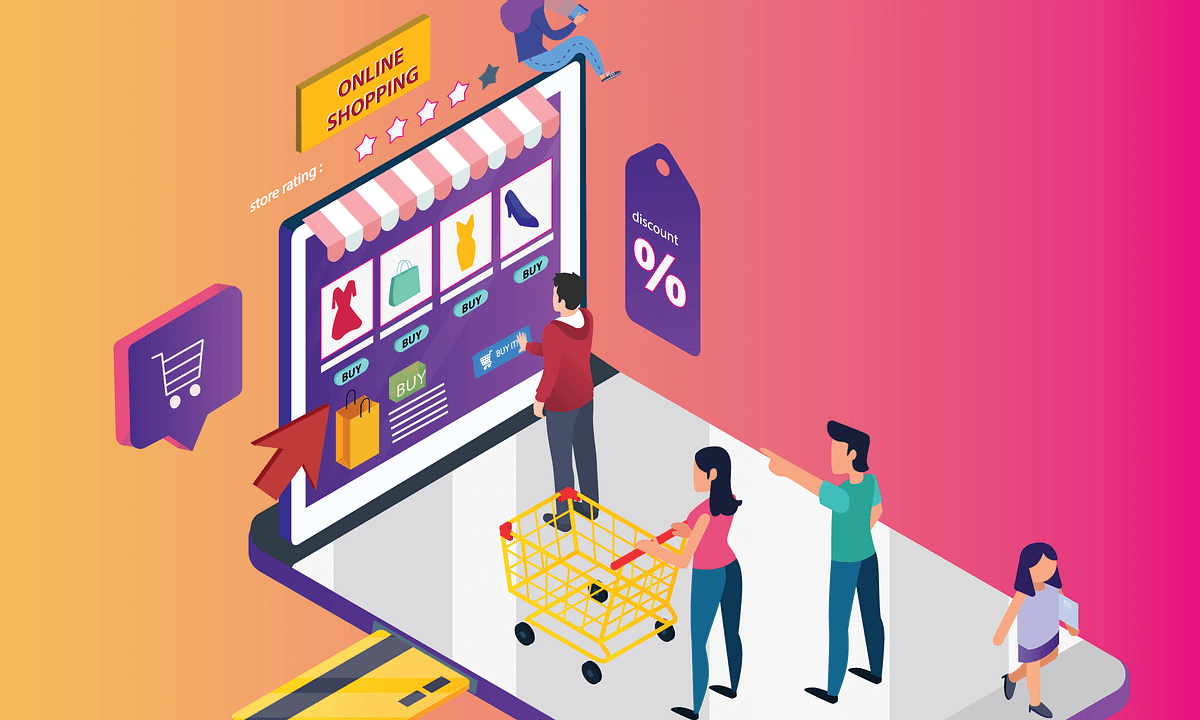

The visitor's shopping intent refers to their motivation or purpose for visiting an online store or website.
It's the reason why they're browsing, searching, or exploring the site.

Common shopping intents:

1. Transactional: Intent to buy or make a purchase.
2. Informational: Seeking product information, reviews, or comparisons.
3. Browsing: Exploring products or categories without immediate purchase plans.
4. Research: Gathering information for future purchases.
5. Comparison: Comparing prices, features, or products.

By recognizing shopping intent, businesses can:

- Tailor content and offers
- Streamline navigation
- Provide relevant recommendations
- Boost customer satisfaction
- Drive sales and revenue

**Importing Necessary modules and Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

**Reading Data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Project/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**About Data**

These features track and categorize visitor behavior on a website, providing insights into:

1. Page types visited
2. Time spent on each type

INTRODUCTION TO FEATURES

Page Categories:

1. Administrative- Pages for website management (eg, login, support)
2. Informational- Pages providing information (eg, blog, about us)
3. Product Related- Pages showcasing products/services

Duration Categories:
-measure time spent on respective page types.

1. Administrative Duration-  time spent on admin pages
2. Informational Duration- time spent on informational pages
3. Product Related Duration- time spent on product pages

Engagement Metrics:

1. Bounce Rates- percentage of visitors leaving immediately
2. Exit Rates- percentage of visitors leaving from a specific page

Monetization Metrics:

1. Page Values- average revenue generated per page view
2. Revenue- total revenue generated

Visitor Segmentation:

1. Operating Systems- eg, Windows, macOS, Android
2. Browser- eg, Chrome, Safari, Firefox
3. Region- eg, country,city,region
4. Traffic Type- eg, organic(google), paid(ads,sponsored content),referral(links from other sites),direct(typing URL directly)
5. Visitor Type- eg, new_visitor, returning_visitor(repeat visitors)

Time-Based Dimensions:

1. Special Day- eg, holidays, promotions
2. Month
3. Weekend

**Checking Missing Value**

In [ ]:
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


**Checking Data Type**

In [ ]:
df.dtypes

,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


**Visualizaton**

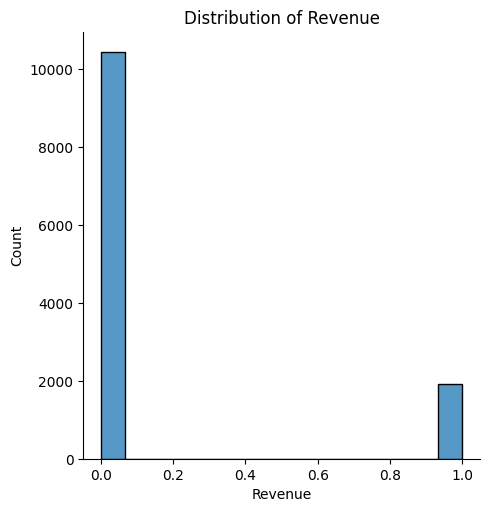

In [ ]:
sns.displot(df['Revenue'])
plt.title('Distribution of Revenue')
plt.show()

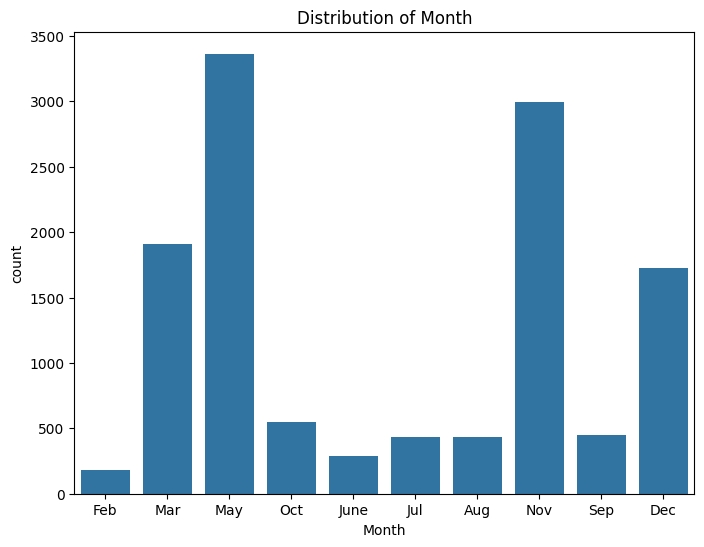

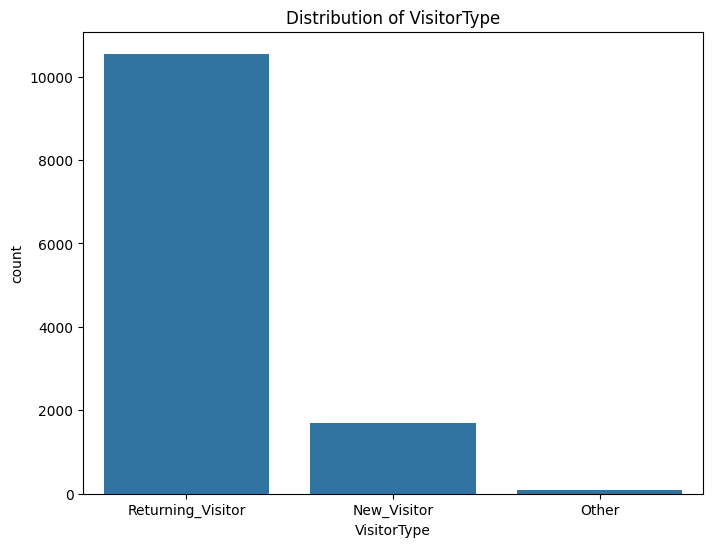

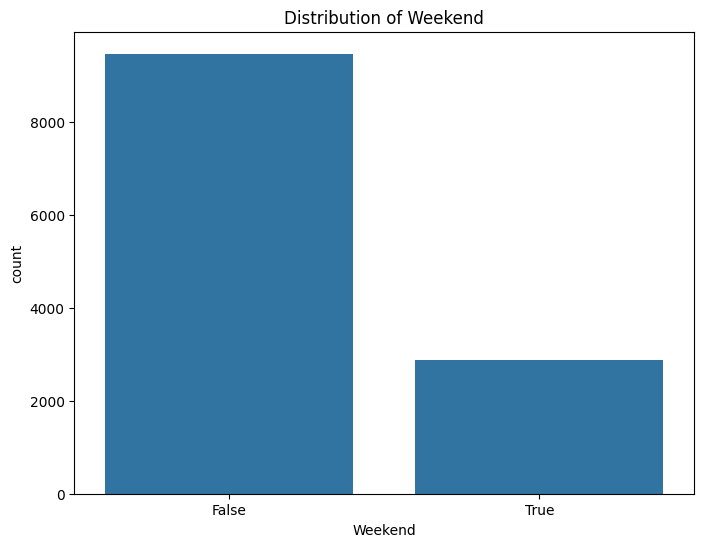

In [ ]:
cat_features = ['Month','VisitorType', 'Weekend']

for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

**Encoding Non-Numeric values to Numeric Values**

In [ ]:
encoder=LabelEncoder()
df['Month']=encoder.fit_transform(df['Month'])
df['VisitorType']=encoder.fit_transform(df['VisitorType'])
df['Weekend']=encoder.fit_transform(df['Weekend'])


**Sperating features and target**

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

**Scaling features**

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

**Spitting Data for training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=3,test_size=0.3)

**Building Models**

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()

In [ ]:
models=[knn,svc,gnb,dt,rf,ab,gb,xgb]
for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n-----------------model-----------------\n',model)
  print(classification_report(y_test,y_pred))


-----------------model-----------------
 KNeighborsClassifier()
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      3141
        True       0.58      0.23      0.33       558

    accuracy                           0.86      3699
   macro avg       0.73      0.60      0.63      3699
weighted avg       0.83      0.86      0.83      3699


-----------------model-----------------
 SVC()
              precision    recall  f1-score   support

       False       0.89      0.99      0.94      3141
        True       0.81      0.31      0.45       558

    accuracy                           0.89      3699
   macro avg       0.85      0.65      0.69      3699
weighted avg       0.88      0.89      0.86      3699


-----------------model-----------------
 GaussianNB()
              precision    recall  f1-score   support

       False       0.94      0.81      0.87      3141
        True       0.40      0.71      0.51       558

    accuracy  

**Checking Class Imbalance**

In [ ]:
y.value_counts()

,count
Revenue,
False,10422
True,1908


**Over Sampling**

In [ ]:
from imblearn.over_sampling import SMOTE
osl=SMOTE(random_state=3)
x_os,y_os=osl.fit_resample(X,y)
y_os.value_counts()

,count
Revenue,
False,10422
True,10422


In [ ]:
x_os_scaled=scaler.fit_transform(x_os)
x_os_train,x_os_test,y_os_train,y_os_test=train_test_split(x_os_scaled,y_os,random_state=3,test_size=0.3)

In [ ]:
for model in models:
  model.fit(x_os_train,y_os_train)
  y_os_pred=model.predict(x_os_test)
  print('\n.............model.............\n',model)
  print(classification_report(y_os_test,y_os_pred))


.............model.............
 KNeighborsClassifier()
              precision    recall  f1-score   support

       False       0.82      0.80      0.81      3165
        True       0.80      0.82      0.81      3089

    accuracy                           0.81      6254
   macro avg       0.81      0.81      0.81      6254
weighted avg       0.81      0.81      0.81      6254


.............model.............
 SVC()
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      3165
        True       0.89      0.80      0.85      3089

    accuracy                           0.86      6254
   macro avg       0.86      0.85      0.85      6254
weighted avg       0.86      0.86      0.85      6254


.............model.............
 GaussianNB()
              precision    recall  f1-score   support

       False       0.83      0.56      0.67      3165
        True       0.66      0.89      0.76      3089

    accuracy                          

**Feature Selection Using Correlation**

In [ ]:
corr_values=df.corr()
corr_values

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.048560,-0.006347,-0.025035,-0.005487,-0.033561,-0.025820,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.029061,-0.007343,-0.015392,-0.005561,-0.014376,-0.023940,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.019743,-0.009527,-0.038235,-0.029169,-0.034491,0.055828,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.005987,-0.009579,-0.019285,-0.027144,-0.024675,0.044677,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.070299,0.004290,-0.013146,-0.038122,-0.043064,0.126656,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.061186,0.002976,-0.007380,-0.033091,-0.036377,0.119329,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.023763,0.023823,-0.015772,-0.006485,0.078286,0.135536,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.039049,0.014567,-0.004442,-0.008907,0.078616,0.179144,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.021780,0.018508,0.045592,0.011315,0.012532,-0.111228,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.079341,0.012652,0.003499,-0.016098,0.052301,0.085557,-0.016767,-0.082305


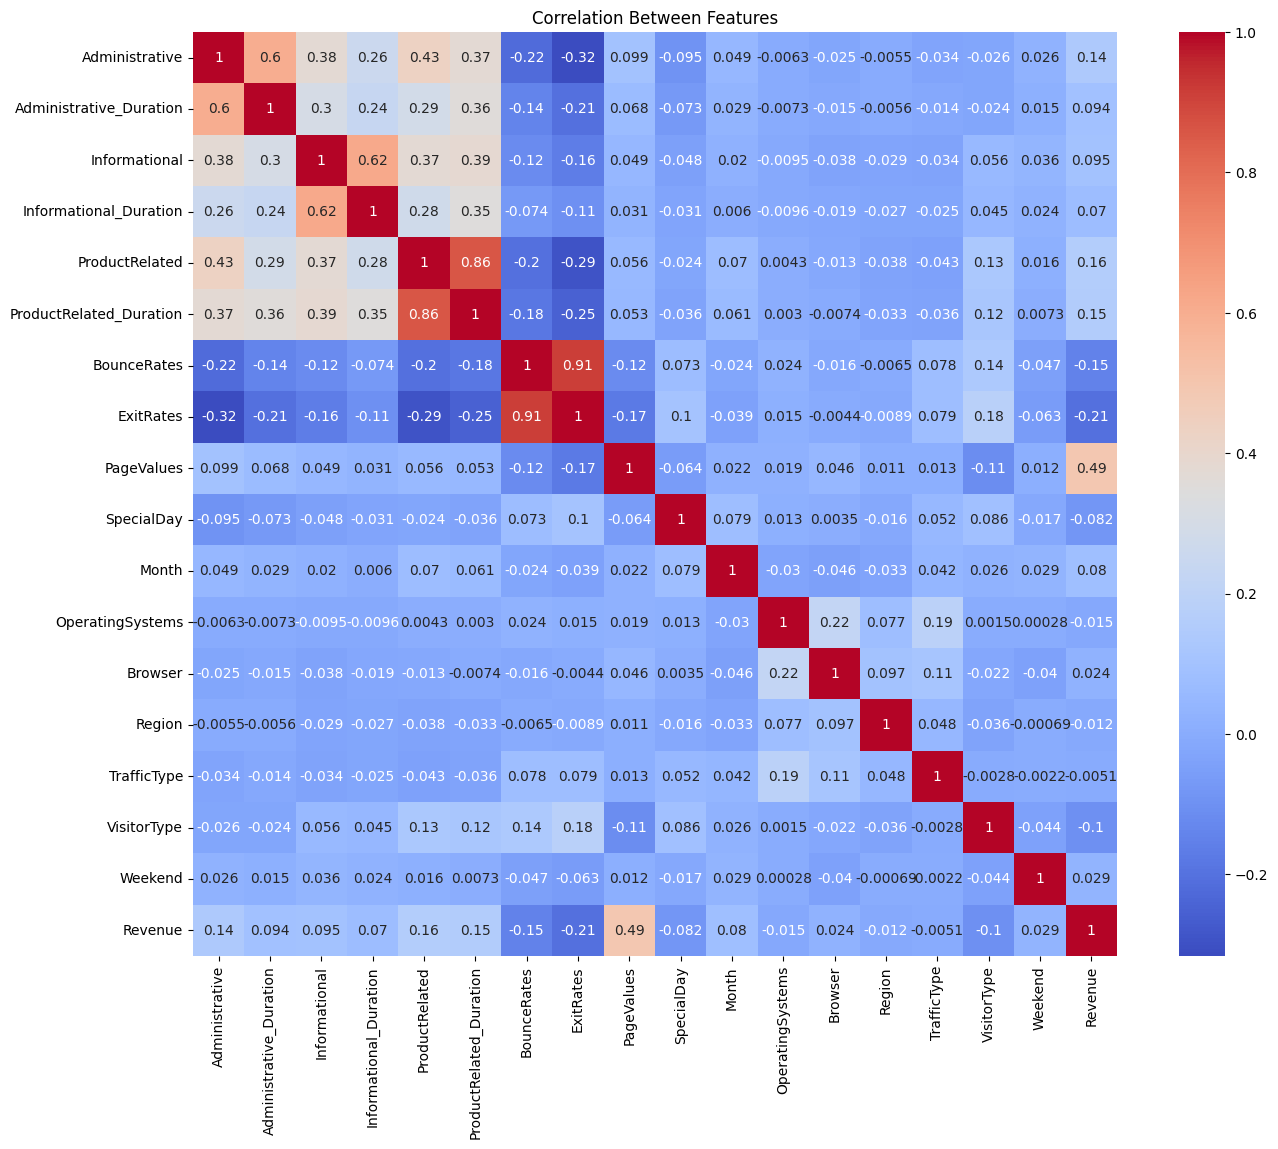

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_values,annot=True,cmap='coolwarm',square=True)
plt.title('Correlation Between Features')
plt.show()

**dropping colm with corr value between -0.05 and +0.05**

In [ ]:
x_os.drop(['OperatingSystems','Region','TrafficType','Browser'],axis=1,inplace=True)

In [ ]:
scaler1=MinMaxScaler()
x_corr_scaled=scaler1.fit_transform(x_os)

In [ ]:
x_corr_train,x_corr_test,y_corr_train,y_corr_test=train_test_split(x_corr_scaled,y_os,random_state=3,test_size=0.3)

In [ ]:
for model in models:
  model.fit(x_corr_train,y_corr_train)
  y_corr_pred=model.predict(x_corr_test)
  print('\n*************model*************\n',model)
  print(classification_report(y_corr_test,y_corr_pred))

**There is no change after feature selection**

**Hyper Parameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'loss':['log_loss','exponential'],
         'criterion':['friedman_mse','squared_error'],
         'max_features':['sqrt','log2',None],
         'random_state':[1,3,5]}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
xgboost=GridSearchCV(xgb,params,cv=10,scoring='accuracy')
xgboost.fit(x_os_train,y_os_train)

In [ ]:
y_pred_t=xgboost.predict(x_os_test)
y_pred_t

In [ ]:
print(classification_report(y_os_test,y_pred_t))

In [ ]:
import pickle
pickle.dump(xgb,open('model.sav','wb'))
pickle.dump(scaler1,open('scaler.sav','wb'))